In [22]:
import numpy as np
import matplotlib.pyplot as plt
import bezier

In [41]:
control_points = np.array([
    (0, 0), (1, 1), (2, 3), (1, 4),
    (0, 4), (-1, 3), (0, 1), (1, 0)
])

In [42]:
control_points

array([[ 0,  0],
       [ 1,  1],
       [ 2,  3],
       [ 1,  4],
       [ 0,  4],
       [-1,  3],
       [ 0,  1],
       [ 1,  0]])

In [43]:
# Create a Bézier curve
nodes = control_points.T
curve = bezier.Curve(nodes, degree=7)
t_values = np.linspace(0, 1, 100)
curve_points = curve.evaluate_multi(t_values).T

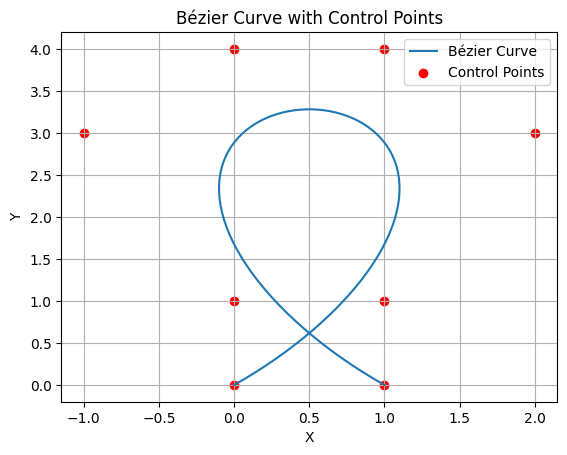

In [44]:

# Plot the curve and control points
plt.plot(curve_points[:, 0], curve_points[:, 1], label='Bézier Curve')
plt.scatter(control_points[:, 0], control_points[:, 1], color='red', label='Control Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bézier Curve with Control Points')
plt.legend()
plt.grid()
plt.show()

In [45]:
#Work begins here

In [68]:
def point_from_bezier(cpoints, t):
    if (len(cpoints) == 1):
        return cpoints[0]

    cpoints_new = [
        (
            (1-t) * cpoints[i][0] + t* cpoints[i+1][0],
            (1-t) * cpoints[i][1] + t* cpoints[i+1][1]
        )
        for i in range(len(cpoints)-1)
    ]
    
    return point_from_bezier(cpoints_new, t)

In [69]:
control_points

array([[ 0,  0],
       [ 1,  1],
       [ 2,  3],
       [ 1,  4],
       [ 0,  4],
       [-1,  3],
       [ 0,  1],
       [ 1,  0]])

In [112]:
t_values = np.linspace(0, 1, 1000)
points = [point_from_bezier(control_points, t) for t in t_values]

In [113]:
# points = np.array(points)
# plt.plot(points[:, 0], points[:, 1], label='Bézier Curve (De Casteljau)')
# plt.scatter(*zip(*control_points), color='red', label='Control Points')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Bézier Curve with Control Points (De Casteljau)')
# plt.legend()
# plt.grid()
# plt.show()

In [117]:
list(points)
tolerance = 1e-3

In [120]:
from itertools import combinations

In [121]:
close_pairs = close_pairs = [((i, j), points[i], points[j]) for (i, j) in combinations(range(len(points)), 2) if abs(points[i][0] - points[j][0]) < tolerance and abs(points[i][1] - points[j][1]) < tolerance]

In [124]:
close_pairs[0][0]

(75, 924)

In [127]:
reduced_points = points[close_pairs[0][0][0]:close_pairs[0][0][1]]

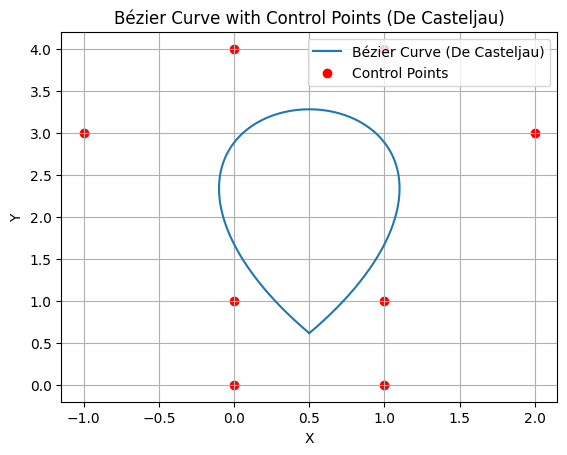

In [129]:
reduced_points = np.array(reduced_points)
plt.plot(reduced_points[:, 0], reduced_points[:, 1], label='Bézier Curve (De Casteljau)')
plt.scatter(*zip(*control_points), color='red', label='Control Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bézier Curve with Control Points (De Casteljau)')
plt.legend()
plt.grid()
plt.show()

In [130]:
reduced_points

array([[0.50006472, 0.61639317],
       [0.50609347, 0.6254912 ],
       [0.51209892, 0.63460382],
       ...,
       [0.48191916, 0.64373071],
       [0.48790108, 0.63460382],
       [0.49390653, 0.6254912 ]])

In [137]:
def shoelace_area(points):
    n = len(points)
    area = 0
    for i in range(n):
        j = (i + 1) % n
        area += (points[i][0] * points[j][1]) - (points[j][0] * points[i][1])
    return area/2

In [138]:
shoelace_area(reduced_points)

2.253693133752565